# 1. ENTENDER EL DATASET
- Club: Nombre del club
- Competition: Liga en la que compite
-  Age : Edad promedio del equipo
-   Squad_size: Tamaño de la plantilla
-  Market_Value: Valor total de mercado del club
-  Market_value_of_players: Valor medio de mercado por jugador
-  MV_top_18_players: Valor de mercado del top 18 de jugadores
-  Share_of_MV: Porcentaje que representa el top 18 sobre el valor total

## PASO 1: CARGAR Y REVISAR EL DATASET

In [3]:
import pandas as pd

In [4]:
df= pd.read_csv("most_valuable_teams.csv")

In [5]:
df.head() # Esto nos da una idea general de cómo se ven los datos 

,Club,Competition,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
0,Manchester City,Premier League,27.2,23,€1.05bn,€45.75m,€988.00m,93.9 %
1,Paris Saint-Germain,Ligue 1,26.1,35,€997.75m,€28.51m,€889.00m,89.1 %
2,Manchester United,Premier League,28.0,28,€937.25m,€33.47m,€850.00m,90.7 %
3,Chelsea FC,Premier League,26.8,27,€882.50m,€32.69m,€816.00m,92.5 %
4,Liverpool FC,Premier League,27.0,27,€879.50m,€32.57m,€810.50m,92.2 %


In [6]:
# A continuación revisamos forma y columnas, con shape y columns
df.shape

(100, 8)

In [7]:
df.columns

Index(['Club', 'Competition', 'Age', 'Squad_size', 'Market_value',
       'Market_value_of_players', 'MV_Top_18_players', 'Share_of_MV'],
      dtype='object')

## PASO 2: INFORMACIÓN GENERAL Y VALORES NULOS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Club                     100 non-null    object 
 1   Competition              100 non-null    object 
 2   Age                      100 non-null    float64
 3   Squad_size               100 non-null    int64  
 4   Market_value             100 non-null    object 
 5   Market_value_of_players  100 non-null    object 
 6   MV_Top_18_players        100 non-null    object 
 7   Share_of_MV              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB


In [10]:
df.isnull().sum()

Club                       0
Competition                0
Age                        0
Squad_size                 0
Market_value               0
Market_value_of_players    0
MV_Top_18_players          0
Share_of_MV                0
dtype: int64

In [11]:
# En este caso no hay nulos, aunque si los hubiera podriamos eliminarlos con df.dropna() 
# o reemplazarlos con df.fillna(value, inplace=True)

## PASO 3: LIMPIAR COLUMNAS NUMÉRICAS CON SÍMBOLOS
### Columnas como Market_value o Share_of_MV tienen símbolos €, m 0 %. Las convertimos a numéricas

In [13]:
# Eliminar € y 'm', convertir a float:
# Función para limpiar y convertir texto a float
def limpiar_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('€', '').replace('m', '').replace('%', '').replace(',', '.').strip()
        if valor == '' or valor.lower() in ['nan', '-', 'n/a', 'na']:
            return None
        try:
            return float(valor)
        except ValueError:
            return None
    return valor

# Aplicar a cada columna relevante
df['Market_value'] = df['Market_value'].apply(limpiar_valor)
df['Market_value_of_players'] = df['Market_value_of_players'].apply(limpiar_valor)
df['MV_Top_18_players'] = df['MV_Top_18_players'].apply(limpiar_valor)
df['Share_of_MV'] = df['Share_of_MV'].apply(limpiar_valor)


In [14]:
df[['Market_value', 'Market_value_of_players', 'MV_Top_18_players', 'Share_of_MV']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Market_value             99 non-null     float64
 1   Market_value_of_players  100 non-null    float64
 2   MV_Top_18_players        100 non-null    float64
 3   Share_of_MV              100 non-null    float64
dtypes: float64(4)
memory usage: 3.3 KB


In [15]:
df.isnull().sum()

Club                       0
Competition                0
Age                        0
Squad_size                 0
Market_value               1
Market_value_of_players    0
MV_Top_18_players          0
Share_of_MV                0
dtype: int64

In [16]:
df['Market_value'].describe()

count     99.000000
mean     285.043131
std      219.027968
min       93.500000
25%      126.250000
50%      198.200000
75%      353.000000
max      997.750000
Name: Market_value, dtype: float64

## PASO 4: ESTADISTICAS DESCRIPTIVAS

In [18]:
df.describe()

,Age,Squad_size,Market_value,Market_value_of_players,MV_Top_18_players,Share_of_MV
count,100.00000,100.00000,99.000000,100.000000,100.000000,100.000000
mean,26.30800,27.54000,285.043131,10.852200,270.750800,92.418000
std,1.39499,2.87244,219.027968,8.848602,213.423125,3.010399
min,23.10000,21.00000,93.500000,2.920000,84.950000,83.700000
25%,25.40000,26.00000,126.250000,4.695000,118.250000,90.575000
50%,26.25000,27.00000,198.200000,7.570000,185.450000,92.400000
75%,27.42500,29.00000,353.000000,13.922500,344.750000,95.025000
max,29.90000,35.00000,997.750000,45.750000,988.000000,98.600000


## PASO 5: VISUALIZANDO INDIVIDUALES

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### HISTOGRAMA DE EDADES

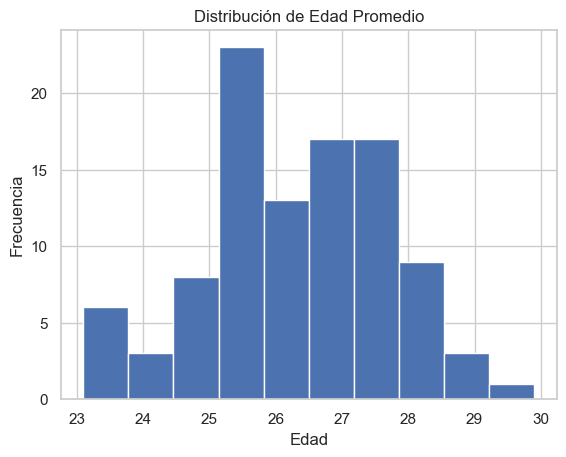

In [22]:
df['Age'].hist(bins=10)
plt.title("Distribución de Edad Promedio")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### BOXPLOT DE VALOR DE MERCADO

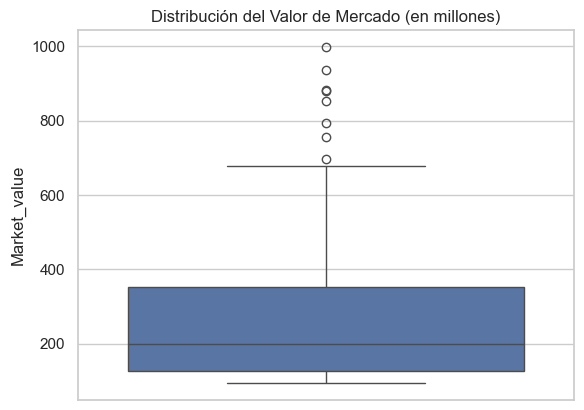

In [24]:
sns.boxplot(df['Market_value'])
plt.title("Distribución del Valor de Mercado (en millones)")
plt.show()

## PASO 6: COMPARACIONES ENTRE LIGAS
### VALOR DE MERCADO PROMEDIO POR COMPETICION

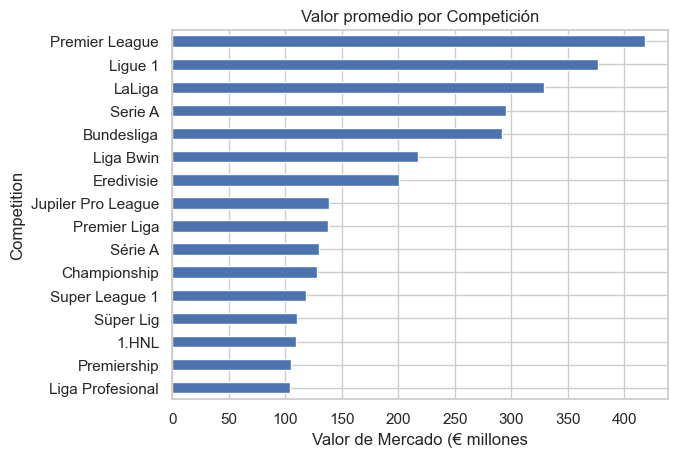

In [26]:
df.groupby('Competition')['Market_value'].mean().sort_values().plot(kind = 'barh')
plt.title("Valor promedio por Competición")
plt.xlabel("Valor de Mercado (€ millones")
plt.show()

## PASO 7: CORRELACIONES
### MATRIZ DE CORRELACIÓN

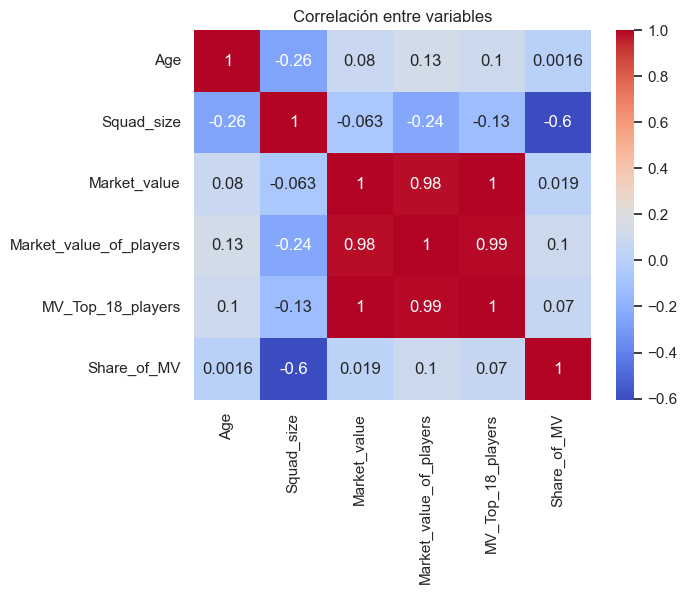

In [28]:
corr = df[['Age','Squad_size','Market_value','Market_value_of_players','MV_Top_18_players', 'Share_of_MV']].corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()
# Esto te muestra: 
# - La edad afecta el valor?
# - Tener mas jugadores se relaciona con mayor valor?

## PASO 8: RESPONDER PREGUNTAS CLAVE
### ¿QUÉ EQUIPO TIENE EL MAYOR VALOR DE MERCADO?

In [30]:
df[df['Market_value'] == df['Market_value'].max()][['Club', 'Market_value']]

,Club,Market_value
1,Paris Saint-Germain,997.75


### ¿QUÉ CLUB TIENE LA MAYOR PROPORCIÓN DE VALOR CONCENTRADA EN SUS 18 MEJORES JUGADORES?

In [32]:
df.sort_values('Share_of_MV', ascending=False)[['Club', 'Share_of_MV']].head()

,Club,Share_of_MV
56,Zenit St. Petersburg,98.6
53,Stade Rennais FC,98.2
38,Leeds United,97.9
67,Celta de Vigo,97.7
91,Feyenoord Rotterdam,97.5


### ¿QUÉ LIGA TIENE EL MAYOR NÚMERO DE EQUIPOS EN EL TOP?

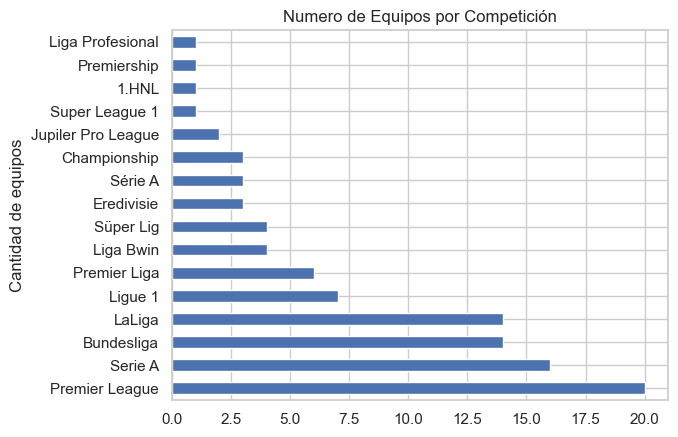

In [34]:
df['Competition'].value_counts().plot(kind='barh')
plt.title("Numero de Equipos por Competición")
plt.ylabel("Cantidad de equipos")
plt.show()

## PASO 9: INSIGHTS FINALES
### PUEDES CONCLUIR COSAS COMO:
- La Premier League domina en numero de equipos valiosos.
- El valor de mercado se concentra en gran parte en los 18 mejores jugadores del club.
- Algunas ligas tienen menor promedio de edad.